In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
!git clone https://github.com/illliyas/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 1613, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1613 (delta 15), reused 0 (delta 0), pack-reused 1583
Receiving objects: 100% (1613/1613), 278.13 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (1537/1537), done.


In [22]:
data = pd.read_csv('Machine-Learning/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [24]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [25]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data=np.array(data).reshape(-1,1)

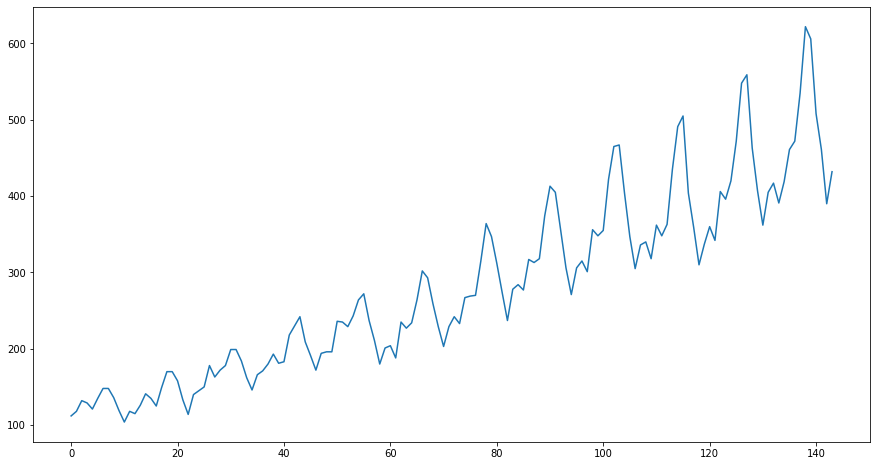

In [26]:
plt.figure(figsize=(15,8))
plt.plot(data)

**Feature** **Scaling**

In [27]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [29]:
train_size=100
test_size=44

In [30]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [31]:
train.shape

(100, 1)

In [32]:
test.shape

(44, 1)

In [33]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [41]:
look_back = 2
X_train, y_train = get_data(train, look_back)

In [42]:
X_train

array([[0.01544402, 0.02702703],
       [0.02702703, 0.05405405],
       [0.05405405, 0.04826255],
       [0.04826255, 0.03281853],
       [0.03281853, 0.05984556],
       [0.05984556, 0.08494208],
       [0.08494208, 0.08494208],
       [0.08494208, 0.06177606],
       [0.06177606, 0.02895753],
       [0.02895753, 0.        ],
       [0.        , 0.02702703],
       [0.02702703, 0.02123552],
       [0.02123552, 0.04247104],
       [0.04247104, 0.07142857],
       [0.07142857, 0.05984556],
       [0.05984556, 0.04054054],
       [0.04054054, 0.08687259],
       [0.08687259, 0.12741313],
       [0.12741313, 0.12741313],
       [0.12741313, 0.1042471 ],
       [0.1042471 , 0.05598456],
       [0.05598456, 0.01930502],
       [0.01930502, 0.06949807],
       [0.06949807, 0.07915058],
       [0.07915058, 0.08880309],
       [0.08880309, 0.14285714],
       [0.14285714, 0.11389961],
       [0.11389961, 0.13127413],
       [0.13127413, 0.14285714],
       [0.14285714, 0.18339768],
       [0.

In [43]:
y_train

array([0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
       0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703,
       0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054,
       0.08687259, 0.12741313, 0.12741313, 0.1042471 , 0.05598456,
       0.01930502, 0.06949807, 0.07915058, 0.08880309, 0.14285714,
       0.11389961, 0.13127413, 0.14285714, 0.18339768, 0.18339768,
       0.15444015, 0.11196911, 0.08108108, 0.11969112, 0.12934363,
       0.14671815, 0.17181467, 0.14864865, 0.15250965, 0.22007722,
       0.24324324, 0.26640927, 0.2027027 , 0.16795367, 0.13127413,
       0.17374517, 0.17760618, 0.17760618, 0.25482625, 0.25289575,
       0.24131274, 0.26833977, 0.30888031, 0.32432432, 0.25675676,
       0.20656371, 0.14671815, 0.18725869, 0.19305019, 0.16216216,
       0.25289575, 0.23745174, 0.25096525, 0.30888031, 0.38223938,
       0.36486486, 0.2992278 , 0.24131274, 0.19111969, 0.24131274,
       0.26640927, 0.24903475, 0.31467181, 0.31853282, 0.32046

In [44]:
X_test, y_test = get_data(test, look_back)

In [45]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [46]:
X_train.shape

(97, 2, 1)

In [ ]:
97 = No of samples
2 = time steps
1 = featue

In [52]:
look_back

2

**LSTM**

In [50]:
model = Sequential()
model.add(LSTM(5, input_shape = (look_back, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 2s 2ms/step - loss: 0.0712
Epoch 2/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 3/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 4/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 5/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 6/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 7/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 8/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 9/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 10/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 11/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 12/25
97/97 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 13/25
97/97 [==============================

In [54]:
y_pred = model.predict(X_test)

In [55]:
scaler.scale_

array([0.0019305])

In [56]:
y_pred = scaler.inverse_transform(y_pred)

In [57]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

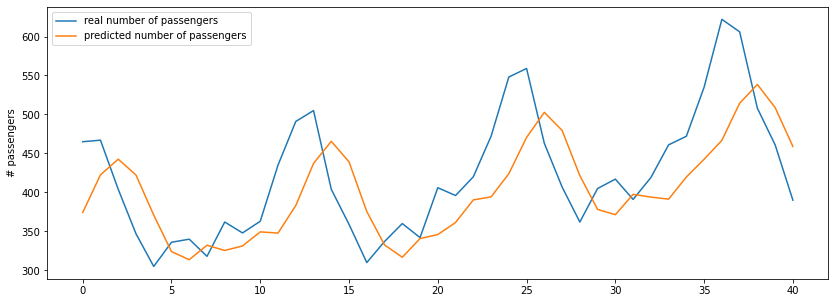

In [58]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()